# K-Nearest Neighbors (KNN) Regression

## 1. Introduction
- **KNN Regression** is a non-parametric, instance-based learning algorithm.
- It predicts the target value for a new data point by averaging (or weighting) the target values of its **k nearest neighbors** in feature space.
- Unlike linear regression, it makes **no assumptions about data distribution**.

## 2. How KNN Regression Works
1. Choose a value of `k` (number of neighbors).
2. Compute the distance (e.g., Euclidean) between the new point and all training samples.
3. Select the `k` closest points.
4. Predict the output as the **mean** (or weighted mean) of those neighbors.

## 3. Distance Metrics
- **Euclidean Distance**: $d(x,y) = \\sqrt{\\sum (x_i - y_i)^2}$
- **Manhattan Distance**: $d(x,y) = \\sum |x_i - y_i|$
- **Minkowski Distance**: Generalized version with power parameter $p$.

## 4. Advantages and Limitations
**Advantages**
- Simple, intuitive, non-parametric.
- Works well with small to medium datasets.

**Limitations**
- Sensitive to irrelevant features and scaling.
- Computationally expensive for large datasets.
- Performance depends heavily on the choice of `k`.

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# We'll use the Diabetes dataset from sklearn (regression problem)
diabetes = load_diabetes()

# Convert to DataFrame for readability
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [10]:
# Features (X) and Target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split into train-test (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (KNN is distance-based → scaling is important!)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Diabetes dataset is already scaled hence not needed.
X_train_scaled = X_train
X_test_scaled = X_test

In [11]:
# Initialize KNN Regressor with k=5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = knn.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 3019.08
R² Score: 0.43


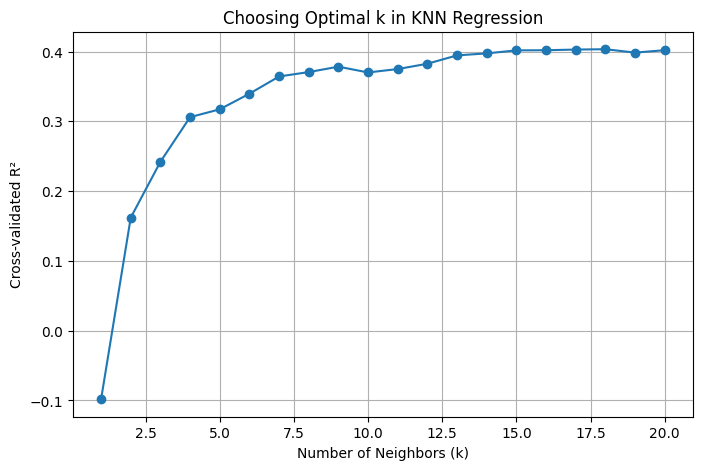

Best k: 18 with R² = 0.40


In [12]:
# Find the best 'k' using cross-validation
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='r2')
    cv_scores.append(scores.mean())

# Plot R² vs k
plt.figure(figsize=(8,5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-validated R²')
plt.title('Choosing Optimal k in KNN Regression')
plt.grid()
plt.show()

best_k = k_values[np.argmax(cv_scores)]
print(f"Best k: {best_k} with R² = {max(cv_scores):.2f}")


In [13]:
# Retraining with the best k

knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimized Mean Squared Error: {mse_best:.2f}")
print(f"Optimized R² Score: {r2_best:.2f}")

Optimized Mean Squared Error: 3083.90
Optimized R² Score: 0.42


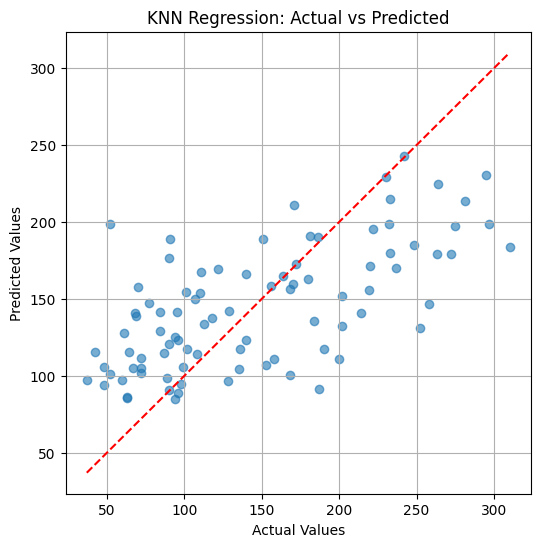

In [14]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression: Actual vs Predicted')
plt.grid()
plt.show()



# Conclusion
- KNN Regression predicts values based on the average of nearest neighbors.
- Scaling is **crucial** due to distance-based computation.
- The choice of `k` significantly affects performance:
  - Small `k` → high variance, low bias (may overfit).
  - Large `k` → high bias, low variance (may underfit).
- Best `k` can be chosen via cross-validation.

KNN Regression is best for smaller datasets with smooth variations but can be inefficient for high-dimensional or very large datasets.